In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly import tools
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
apiKey = 'lQg24SpLGpWSL3Yn35VS'
plotly.tools.set_credentials_file(username='amcdonne', api_key=apiKey)
plotly.tools.set_config_file(world_readable=False, sharing='private')

# (i) Firm Value

### (a) Simulate the value of the firm 250,000 times over a 20 year period using the Merton Model

In [3]:
def merton_model(V, K, sigma, T, dt, iRate, num_paths):
    num_periods = int(T*dt**-1)
    #Creates a matrix filled with zeros; Rows: num_paths, Columns: num_periods
    asset_value = np.zeros((num_periods + 1, int(num_paths)))
    asset_value[0] = V
    for t in range(1, num_periods+1):
        if t > 120:
            sigma = .25
        # The stochastic equation for simulating the firm value
        asset_value[t] = asset_value[t-1]*np.exp((iRate -.5*sigma**2)*dt +sigma*np.random.randn(num_paths))
    return asset_value

In [4]:
simulated_asset_values = merton_model(V=100, K=80, sigma=.15, T=20, dt=1/12, iRate=0.031, num_paths=250000)

In [5]:
#np.random.randint(250000)

trace0 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 1'
)
trace1 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 2'
)
trace2 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 3'
)
trace3 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 4'
)
trace4 = go.Scatter(
    y = simulated_asset_values[:,np.random.randint(250000)],
    mode = 'lines',
    name = 'Path 5'
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = dict(title = 'Asset Value Simulation',
              xaxis = dict(title = 'Time Period in months'),
              yaxis = dict(title = 'Asset Value'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Credit-Risk-Merton_Monte_Carlo')

C:\Users\austi\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### (b) Plot Residual Firm Values

In [6]:
residual_firm_value = simulated_asset_values - 80

In [13]:
# Was originally trying to separate all of the defaluted and non defaulted paths from any point in time
#np array (rows, columns); we want to get rid of all the columns where any row is less than 80
#not_defaulted = simulated_asset_values > 80
#np.sum(not_defaulted, axis=1)
#not_defaulted[:,5]
data = [go.Histogram(x=residual_firm_value[-1,:])]
layout = dict(title = 'Asset Values at T Histogram',
              xaxis = dict(title = 'Number of observations'),
              yaxis = dict(title = 'Asset Value'),
              )

fig = dict(data=data, layout=layout)

#py.iplot(fig, filename='Credit-Risk-Merton_Distribution')

C:\Users\austi\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



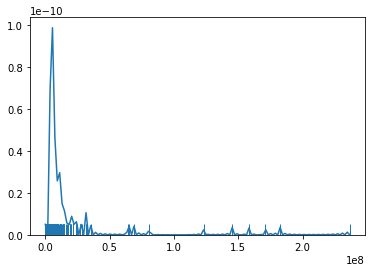

In [11]:
sns.distplot(residual_firm_value[-1,:], hist=False, rug=True);

### (c) Default Probability @ T

In [42]:
def default_probability(V_0, K, sigma, T, iRate):
    d1 = (np.log(V_0/K) + (iRate + .5*sigma**2)*T)/ (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    print(sp.norm.pdf(d1))
    print(sp.norm.pdf(d2))
    print(sp.norm.pdf(-d2))
    equity_0 = V_0*sp.norm.cdf(d1) - K*np.exp(-iRate*T)*sp.norm.cdf(d2)
    return ('Call Option Price: ' + str(round(equity_0, 2)),'Probabilty of Default @ T: ' + str(round(sp.norm.cdf(-d2)*100, 2)) + '%')

In [43]:
default_probability(V_0=100, K=80, sigma=.25, T=20, iRate=0.031)

0.16844992942261527
0.3914203718134209
0.3914203718134209


('Call Option Price: 65.7', 'Probabilty of Default @ T: 42.27%')

### (d) Black Cox Model: Stopping time of default